In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [28]:
db = fetch_california_housing(as_frame = True)

In [29]:
df = db.frame

In [30]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [31]:
X = df[['MedInc']]

In [35]:
y = df[['MedHouseVal']]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [55]:
def LinearRegression(X, y, theta,learning_rate, iterations):
    m = len(X)
    for _ in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
    
    return theta

In [56]:
def MSE(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

In [61]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [62]:
theta_init = np.zeros((1,1))

In [63]:
theta_final = LinearRegression(X_train, y_train,theta_init, learning_rate=0.01, iterations= 1000)

Theta (slope only): [0.51130008]
MSE: 0.761018941492966


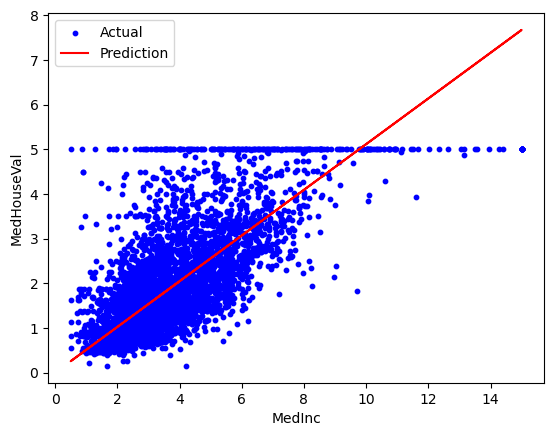

In [64]:
y_pred = X_test.dot(theta_final)
mse = MSE(y_pred, y_test)
print("Theta (slope only):", theta_final.ravel())
print("MSE:", mse)


plt.scatter(X_test, y_test, color='blue', s=10, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Prediction')
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.legend()
plt.show()